In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score

from common.data_frame_columns import PM10, PM2_5, PM1
from common.date_time_helper import convert_to_datetime
from common.endpoints_urls import endpoints_config
from common.working_dataset_config import working_datetime, test_date_time_strings
from data_management.data_crawler import DataManager
from data_management.data_reshaper import reshape_data, prepare_dataset, flatten_data
from data_management.labeled_data_generator import LabeledDataGenerator, DataLabel
import numpy as np
from sklearn.tree import DecisionTreeClassifier

In [2]:
date_strings = ['01.01.2021 00:00', '31.12.2023 23:59']
test_dates_string = ['01.01.2024 00:00', '30.04.2024 23:59']

training_dates = [convert_to_datetime(date_strings[0]), convert_to_datetime(date_strings[1])]
test_dates = [convert_to_datetime(test_dates_string[0]), convert_to_datetime(test_dates_string[1])]

datas = DataManager(True).get_all_endpoints_data(endpoints_config, update=False)

column = PM10
L = LabeledDataGenerator(column)

test_data = L.generate_labeled_data(datas[:1], test_dates[0], test_dates[1], 40)
single_data = L.generate_labeled_data(datas[:1], training_dates[0], training_dates[1], 40)
multi_data = L.generate_labeled_data(datas, training_dates[0], training_dates[1], 40)

Loading station data: Gronie  https://datahub.ki.agh.edu.pl/api/endpoints/70/data/
    # Minimal data: 2022-07-13 23:38:02+00:00
    # Maximal data: 2024-05-10 16:16:39+00:00
Loading station data: Urząd Gminy  https://datahub.ki.agh.edu.pl/api/endpoints/71/data/
    # Minimal data: 2023-10-28 07:17:18+00:00
    # Maximal data: 2024-05-10 16:15:37+00:00
Loading station data: Młynne  https://datahub.ki.agh.edu.pl/api/endpoints/72/data/
    # Minimal data: 2022-02-12 21:11:18+00:00
    # Maximal data: 2024-05-10 16:15:59+00:00
Loading station data: Sucharskiego  https://datahub.ki.agh.edu.pl/api/endpoints/73/data/
    # Minimal data: 2021-10-07 19:41:43+00:00
    # Maximal data: 2024-05-10 16:19:11+00:00
Loading station data: Twardowskiego  https://datahub.ki.agh.edu.pl/api/endpoints/74/data/
    # Minimal data: 2021-10-07 20:59:56+00:00
    # Maximal data: 2024-05-10 16:20:04+00:00
Loading station data: Konopnickiej  https://datahub.ki.agh.edu.pl/api/endpoints/75/data/
    # Minimal data

In [3]:
class RandomClassifier():
    def __init__(self):
        self.xdxd = DecisionTreeClassifier(random_state=0)

    def fit_data(self, labeled_data, column):
        X, y = prepare_dataset(labeled_data, column)
        self.xdxd.fit(X, y)

    def test_accuracy(self, labeled_data, column):
        X_set, y_set = prepare_dataset(labeled_data, column)
        predicted = self.xdxd.predict(X_set)
        accuracy = accuracy_score(y_set, predicted)
        print("Accuracy of DecisionTree: ", accuracy)
        wrong_predicitons = [[DataLabel(p), DataLabel(y)] for p, y in zip(predicted, y_set) if p != y]
        print("[Predicted, Actual]")
        for error in wrong_predicitons:
            print(str(error[0]) + ", " + str(error[1]))
        return accuracy


In [4]:
class MyDecisionTreeClassifier:
    def __init__(self, max_depth=None):
        self.xdxd = DecisionTreeClassifier(max_depth=max_depth, random_state=0)

    def fit_data(self, labeled_data, column):
        X, y = prepare_dataset(labeled_data, column)
        X = flatten_data(X)
        self.xdxd.fit(X, y)

    def test_accuracy(self, labeled_data, column):
        X_set, y_set = prepare_dataset(labeled_data, column)
        X_set = flatten_data(X_set)
        predicted = self.xdxd.predict(X_set)
        accuracy = accuracy_score(y_set, predicted)
        # print("Accuracy of Decision Tree: ", accuracy)
        # wrong_predicitons = [[DataLabel(p), DataLabel(y)] for p, y in zip(predicted, y_set) if p != y]
        # print("[Predicted, Actual]")
        # for error in wrong_predicitons:
        #     print(str(error[0]) + ", " + str(error[1]))
        return accuracy

checking: DT_SDSC
   10
   20
   30
   40
   50
   60
   70
   80
   90


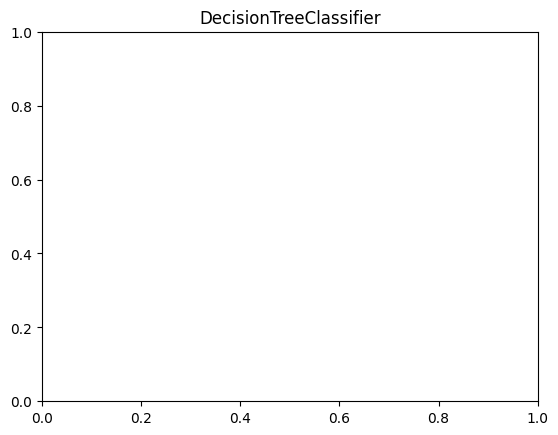

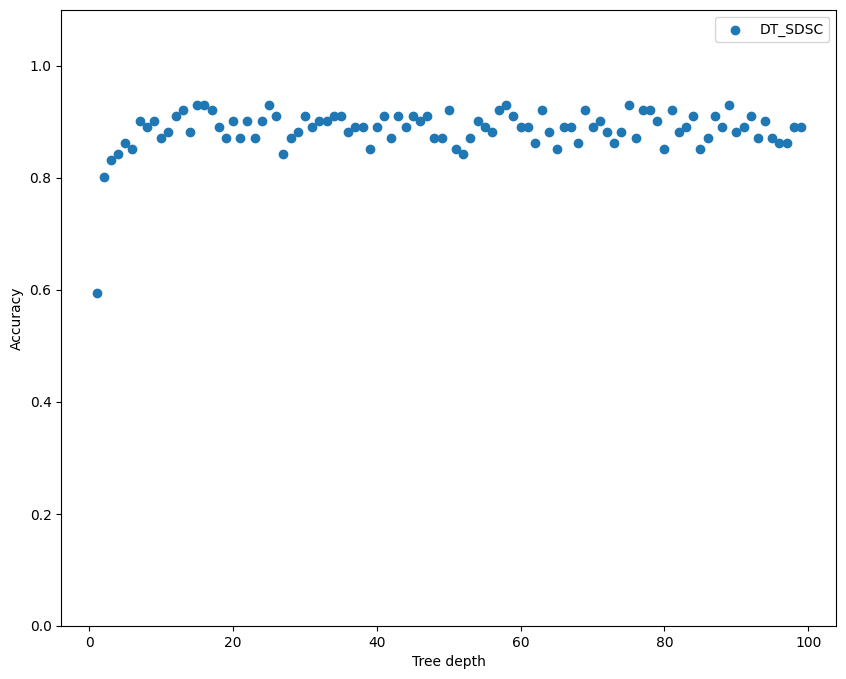

checking: DT_SDMC
   10
   20
   30
   40
   50
   60
   70
   80
   90


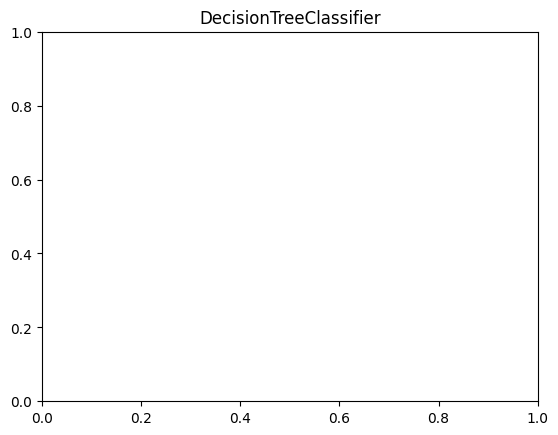

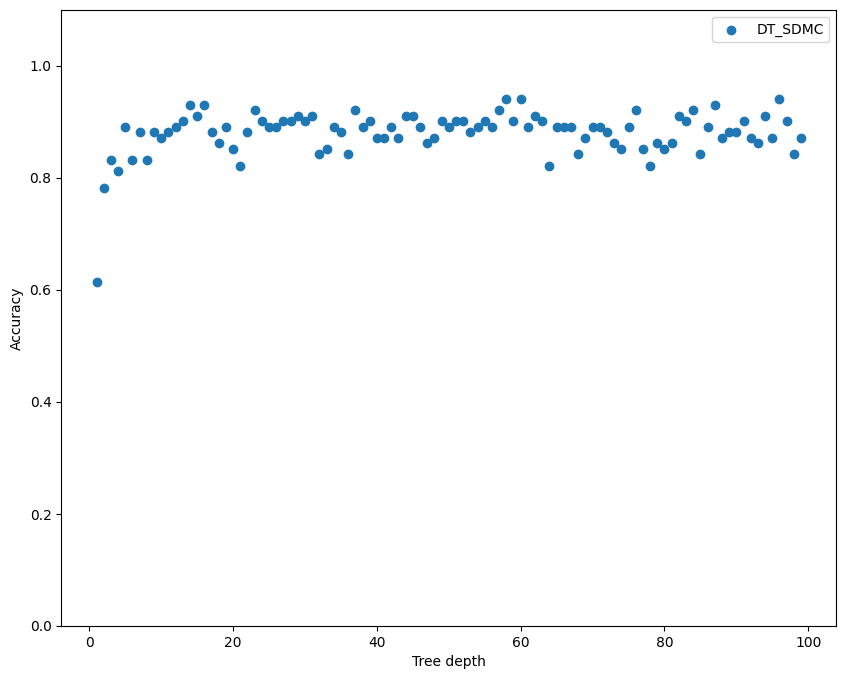

checking: DT_MDSC
   10
   20
   30
   40
   50
   60
   70
   80
   90


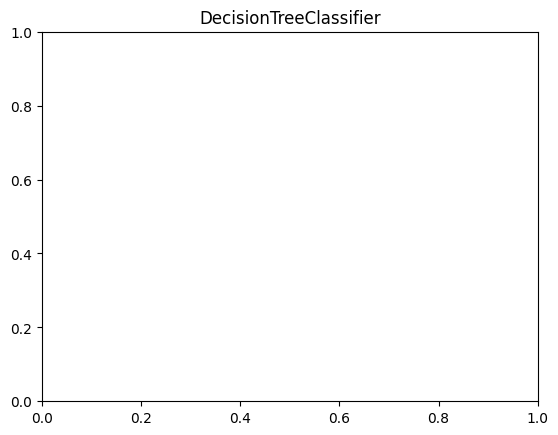

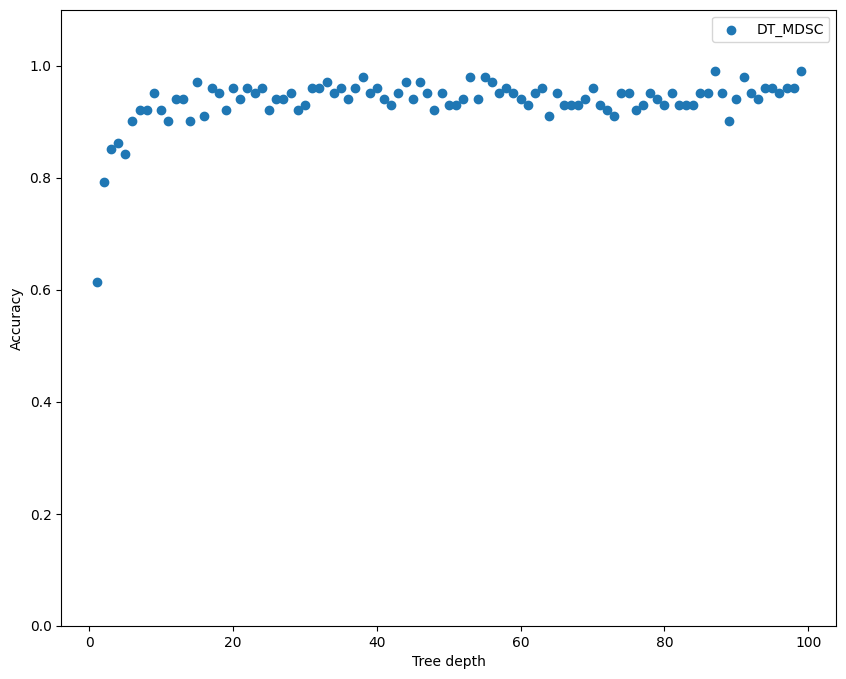

checking: DT_MDMC
   10
   20
   30
   40
   50
   60
   70
   80
   90


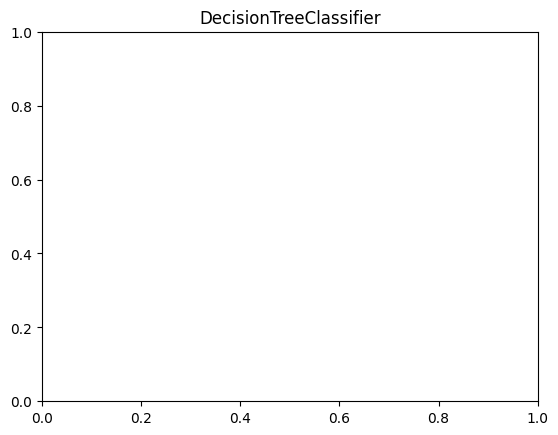

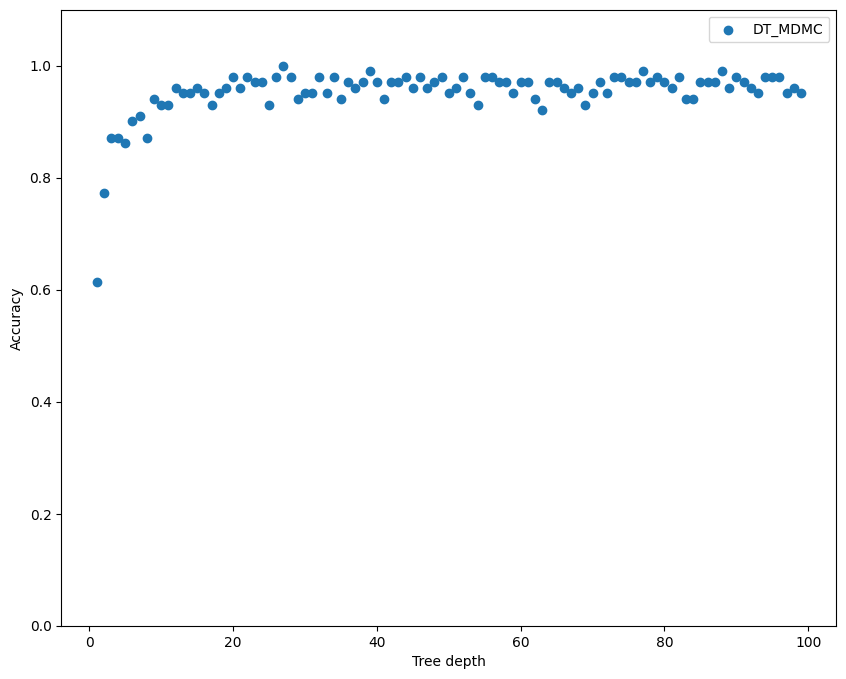

In [5]:
from matplotlib import pyplot as plt

max_depth_of_tree = 100
config_list = [
    {
        'name': 'DT_SDSC',
        'columns': [PM10],
        'training_datas': single_data,
        'test_datas': test_data
    },
    {
        'name': 'DT_SDMC',
        'columns': [PM10, PM1, PM2_5],
        'training_datas': single_data,
        'test_datas': test_data
    },
    {
        'name': 'DT_MDSC',
        'columns': [PM10],
        'training_datas': multi_data,
        'test_datas': test_data
    },
    {
        'name': 'DT_MDMC',
        'columns': [PM10, PM1, PM2_5],
        'training_datas': multi_data,
        'test_datas': test_data
    }
]


for config in config_list:
    name = config['name']
    print("checking: " + name)
    
    plt.title('DecisionTreeClassifier')
    plt.figure(figsize=(10, 8))
    plt.ylabel('Accuracy')
    plt.xlabel('Tree depth')
    x = []
    y = []
    for i in range(1, max_depth_of_tree):
        if i % 10 == 0:
            print(f'   {i}')
        knn = MyDecisionTreeClassifier(i)
        knn.fit_data(config['training_datas'], config['columns'])
        accuracy = knn.test_accuracy(config['test_datas'], config['columns'])
        x.append(i)
        y.append(accuracy)

    plt.scatter(x, y, label=name)
    plt.ylim(0, 1.1)
    plt.legend()
    plt.show()